In [51]:
# This code splits the given dataset to test-train files.
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scienceplots
#import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from pathlib import Path
import os

# Apply the default theme
#sns.set_theme()
#sns.set_style('white')
#sns.set_context("paper", font_scale = 2)
#plt.style.use(['science','no-latex'])
print('Pandas v', pd.__version__)

Pandas v 2.0.0


# Configurations

In [2]:
# Configurations 
#latex_dir = Path(r"C:\Users\3057550\OneDrive - Queen's University Belfast\ECIT\Research\AI_Cybersecurity\Teams Files\Papers\In preparation\NLP for SQLi detection\latex\hybrid_nlp_journal")
#latex_dir = Path(r"C:\Users\kasim\OneDrive - Queen's University Belfast\ECIT\Research\AI_Cybersecurity\Teams Files\Papers\In preparation\NLP for SQLi detection\latex\hybrid_nlp_journal")
latex_dir = Path(r'C:\Users\kasim\Documents\GitHub\hybrid_nlp_journal')
SAVE_OUTPUTS = False

In [3]:
# Notes about result files:

main_folder = Path('../')


results_file = main_folder / 'results' / 'results_230420_164552.csv' # temp - all
print(results_file.is_file())

True


In [4]:
methods={}

methods['classic_ml'] = ['naive_bayes', 'xgboost', 'svm']

method_categories = [method_cat for method_cat in methods]

# Load and Setup Data

In [5]:
# Rename Columns and Index properly (for latex tables and figures)
def rename_table_labels(df_bad_labeled):
    column_mapper = {
        "accuracy": "Accuracy", 
        "precision": "Precision",
        "recall":"Recall",
        "f1_score":"F1",
        "tn":"TN",
        "tp":"TP",
        "fn":"FN",
        "fp":"FP",
        "train_size":"Train Size",
        "test_size":"Test Size",
        "dataset":"Dataset",
        "train_time":"Training Time (ms)",
        "pred_time":"Inference Time (ms)",
        "method":"Method"
        }
    method_mapper = {
        "proposed": "Proposed",
        "bow_nb": "BoW NB",
        "bow_xgboost": "BoW XGBoost", 
        'bow_svm':'BoW SVM',
        'boc_nb': 'BoC NB', 
        'boc_xgboost':'BoC XGBoost', 
        'boc_svm': 'BoC SVM',
        'tfidf_nb': 'TF-IDF NB', 
        'tfidf_xgboost': 'TF-IDF XGBoost', 
        'tfidf_svm': 'TF-IDF SVM', 
        'tfidfng_nb': 'TF-IDF ngram NB',
        'tfidfng_xgboost': 'TF-IDF ngram XGBoost', 
        'tfidfng_svm': 'TF-IDF ngram SVM',
        'xgboost tf-idf': 'TF-IDF XGBoost', 
        'naive_bayes tf-idf': 'TF-IDF NB', 
        'svm tf-idf': 'TF-IDF SVM', 
        'xgboost tf-idf_ngram': 'TF-IDF ngram XGBoost', 
        'naive_bayes tf-idf_ngram': 'TF-IDF ngram NB', 
        'svm tf-idf_ngram':'TF-IDF ngram SVM', 
        'xgboost bag_of_characters':'BoC XGBoost', 
        'naive_bayes bag_of_characters': 'BoC NB', 
        'svm bag_of_characters': 'BoC SVM'
    }
    
    #df_new_labeled = df_bad_labeled.rename(columns=column_mapper, index=index_mapper)
    df_new_labeled = df_bad_labeled.rename(columns=column_mapper)
    #df_new_labeled.index.rename("Method",inplace=True)
    df_new_labeled=df_new_labeled.replace({"Method": method_mapper})
    return df_new_labeled

## Function definitions

In [6]:
#fig, ax = plt.subplots(figsize=(5, 5))
def my_plot_bar(df_small, ax, metric='f1', width=0.9, offset=0):
    
    
    col_names = df_small.columns
    #row_names = df_small.Method
    
    colors = df_small.loc[:,'color'].values
    colors = [list(colors[i][0]) for i in range(len(colors))]

    bar_vals = df_small.loc[:][metric].values.tolist()
    bar_tics = df_small.loc[:]['Method'].values.tolist()
    bar_width = width

    bar_container = ax.bar(x=np.arange(len(bar_tics))+offset, height=bar_vals, 
                           width=bar_width,color=colors, tick_label=bar_tics)
    ax.bar_label(bar_container, fmt='%0.4f', padding=0.8, rotation=90)
    
    #ax.tick_params(axis='x', rotation=70, ha="right")
    plt.setp(ax.get_xticklabels(), rotation=70, ha="right", rotation_mode="default")
    plt.setp(ax.get_xticklabels(),  va="center", rotation_mode="anchor")
    ax.tick_params(axis='x', which='both', bottom=False, top=False)
    ax.tick_params(axis='y', which='both', right=False)
    # Hide the right and top spines
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)

    #ax.set(ylim=(0.8, 1))




In [7]:
#fig, ax = plt.subplots(figsize=(5, 5))
def my_plot_twin_bar(df_small, ax, metric=['F1','Inference Time (ms)']):
    width = 0.3
    offset = 0.3
    my_plot_bar(df_small, ax, metric[0],width=width,offset=0)

    ax2 = ax.twinx()
    ax2.tick_params(axis='x', which='both', bottom=False, top=False)
    ax2.spines.top.set_visible(False)
    # col_names = df_small.columns
    # row_names = df_small.index
    
    colors = df_small.loc[:,'color'].values
    colors = [list(colors[i][0]) for i in range(len(colors))]
    new_colors = np.asarray(colors)/[3.2, 3.2, 3.2, 1]
    new_colors = new_colors.sum(axis=1)-1
    new_colors = np.expand_dims(new_colors, axis=0)
    new_colors = np.tile(new_colors.transpose(),(1,4))
    new_colors[:,3] =1
    colors = new_colors.tolist()
    

    bar_vals = df_small.loc[:][metric[1]].values.tolist()
    bar_tics = df_small.loc[:]['Method'].values.tolist()
    bar_width = width

    bar_container = ax2.bar(x=np.arange(len(bar_tics))+offset, height=bar_vals, 
                           width=bar_width,color=colors, tick_label=bar_tics)
    ax2.bar_label(bar_container, fmt='%0.4fms', padding=0.8, rotation=90)
    
    # #ax.tick_params(axis='x', rotation=70, ha="right")
    # plt.setp(ax.get_xticklabels(), rotation=70, ha="right", rotation_mode="default")
    # plt.setp(ax.get_xticklabels(),  va="center", rotation_mode="anchor")
    # ax.tick_params(axis='x', which='both', bottom=False, top=False)
    # ax.tick_params(axis='y', which='both', right=False)
    # # Hide the right and top spines
    # ax.spines.right.set_visible(False)
    # ax.spines.top.set_visible(False)

    return ax, ax2

    #ax.set(ylim=(0.8, 1))




## Read and preprocess dataset

In [8]:
#%%script echo skip
df_all = pd.read_csv(results_file)
df_all.drop(columns=['method'],inplace=True)


In [9]:
df = df_all.copy()
df.reset_index(drop=True, inplace=True)

### Preprocess datasets

In [10]:
for index, row in df.iterrows():
  for method_cat in methods.keys():
    if df.loc[index, 'model'] in methods[method_cat]:
      df.loc[index,'category'] = method_cat

In [11]:
for index, row in df.iterrows():
  print(df.loc[index, 'model'])
  if df.loc[index,'category'] == 'classic_ml':
    df.loc[index,'Method'] = df.loc[index,'model'] + ' ' + df.loc[index, 'feature_method']
  else:
    df.loc[index,'Method'] = df.loc[index,'model']

#df.set_index('index_col', inplace=True)

xgboost
naive_bayes
svm
xgboost
naive_bayes
svm
xgboost
naive_bayes
svm


In [12]:
#df['index_col'] = df['model'].str.cat(df['feature_method'], sep=' ')
#df.set_index('index_col', inplace=True)

In [13]:
df

,accuracy,precision,recall,f1_score,tp,tn,fp,fn,feature_method,model,...,train_size,test_size,extraction_time,feature_size,train_time,threshold,pred_time,dataset,category,Method
0,0.991833,0.996871,0.981082,0.988914,2230,3842,7,43,tf-idf,xgboost,...,24487,6122,0.951603,21019,0.068004,0.5,0.003364,SQLiV3.tsv,classic_ml,xgboost tf-idf
1,0.982359,0.975824,0.976683,0.976253,2220,3794,55,53,tf-idf,naive_bayes,...,24487,6122,0.951603,21019,0.000634,0.5,0.000338,SQLiV3.tsv,classic_ml,naive_bayes tf-idf
2,0.810683,0.669095,0.969644,0.791809,2204,2759,1090,69,tf-idf,svm,...,24487,6122,0.951603,21019,6.223334,0.5,0.924269,SQLiV3.tsv,classic_ml,svm tf-idf
3,0.997386,0.999557,0.993401,0.996470,2258,3848,1,15,tf-idf_ngram,xgboost,...,24487,6122,5.671179,29216,0.620629,0.5,0.003754,SQLiV3.tsv,classic_ml,xgboost tf-idf_ngram
4,0.920778,0.832837,0.984162,0.902198,2237,3400,449,36,tf-idf_ngram,naive_bayes,...,24487,6122,5.671179,29216,0.002623,0.5,0.002250,SQLiV3.tsv,classic_ml,naive_bayes tf-idf_ngram
5,0.997060,0.999557,0.992521,0.996026,2256,3848,1,17,tf-idf_ngram,svm,...,24487,6122,5.671179,29216,11.038512,0.5,3.319284,SQLiV3.tsv,classic_ml,svm tf-idf_ngram
6,0.996733,0.999557,0.991641,0.995583,2254,3848,1,19,bag_of_characters,xgboost,...,24487,6122,1.378724,77,0.081869,0.5,0.002012,SQLiV3.tsv,classic_ml,xgboost bag_of_characters
7,0.854949,0.758492,0.893973,0.820679,2032,3202,647,241,bag_of_characters,naive_bayes,...,24487,6122,1.378724,77,0.000693,0.5,0.000430,SQLiV3.tsv,classic_ml,naive_bayes bag_of_characters
8,0.991669,0.994657,0.982842,0.988714,2234,3837,12,39,bag_of_characters,svm,...,24487,6122,1.378724,77,0.584460,0.5,0.411925,SQLiV3.tsv,classic_ml,svm bag_of_characters


In [14]:
# set the colormap for each category (classical ml, ensemble, transformer)
metric='f1_score'
method_categories = [i for i in methods.keys()]
method_cat_cm_func = [plt.cm.BuPu, plt.cm.YlGn, plt.cm.OrRd]
#df.loc[:, 'color'] = [0.0]
df['color'] = None
for k, cat in enumerate(method_categories):
    cat_cm_func = method_cat_cm_func[k]
    df_small = df[df['category']==cat] # OR df.loc[methods[cat]]
    
    df_small = df_small.sort_values(metric,ascending=False)
    col_names = df_small.columns
    #row_names = df_small.index

    colors = cat_cm_func(np.linspace(0.1, 0.6, len(df_small)))
    colors = colors[::-1]
    df_small.loc[:, 'color'] = [ 0 for i in range(len(df_small))]
    print(cat)
    #for i in range(len(df_small)):
        #df_small.iloc[i,'color'] = [[np.asarray(colors[i],dtype=float)]]
        #print([[np.asarray(colors[i],dtype=float)]])
        #df_small.loc[i].color
        #print(i, df_small.iloc[i,'color'])
    i = 0
    for index, row in df_small.iterrows():
    #for idx in range(len(df_small)):
      #df_small.loc[index, 'color']=[[np.asarray(colors[i],dtype=float)]]
      #df_small.loc[index, 'color']=[colors[i]]
      #df_small.loc[:, 'color'].iloc[idx] = [[np.asarray(colors[i],dtype=float)]]
      #df_small.loc[index, 'color'] = np.asarray(colors[i], dtype=float)
      df_small.at[index,'color'] = [colors[i]]
      i += 1
        
    df.update(df_small)

classic_ml


In [15]:
df

,accuracy,precision,recall,f1_score,tp,tn,fp,fn,feature_method,model,...,test_size,extraction_time,feature_size,train_time,threshold,pred_time,dataset,category,Method,color
0,0.991833,0.996871,0.981082,0.988914,2230,3842,7,43,tf-idf,xgboost,...,6122,0.951603,21019,0.068004,0.5,0.003364,SQLiV3.tsv,classic_ml,xgboost tf-idf,"[[0.5988465974625145, 0.6934256055363323, 0.83..."
1,0.982359,0.975824,0.976683,0.976253,2220,3794,55,53,tf-idf,naive_bayes,...,6122,0.951603,21019,0.000634,0.5,0.000338,SQLiV3.tsv,classic_ml,naive_bayes tf-idf,"[[0.7114648212226067, 0.801276432141484, 0.888..."
2,0.810683,0.669095,0.969644,0.791809,2204,2759,1090,69,tf-idf,svm,...,6122,0.951603,21019,6.223334,0.5,0.924269,SQLiV3.tsv,classic_ml,svm tf-idf,"[[0.8978854286812764, 0.9390234525182622, 0.96..."
3,0.997386,0.999557,0.993401,0.996470,2258,3848,1,15,tf-idf_ngram,xgboost,...,6122,5.671179,29216,0.620629,0.5,0.003754,SQLiV3.tsv,classic_ml,xgboost tf-idf_ngram,"[[0.5490196078431373, 0.45333333333333337, 0.7..."
4,0.920778,0.832837,0.984162,0.902198,2237,3400,449,36,tf-idf_ngram,naive_bayes,...,6122,5.671179,29216,0.002623,0.5,0.002250,SQLiV3.tsv,classic_ml,naive_bayes tf-idf_ngram,"[[0.7764244521337947, 0.8482122260668974, 0.91..."
5,0.997060,0.999557,0.992521,0.996026,2256,3848,1,17,tf-idf_ngram,svm,...,6122,5.671179,29216,11.038512,0.5,3.319284,SQLiV3.tsv,classic_ml,svm tf-idf_ngram,"[[0.5490196078431373, 0.5379777008842753, 0.75..."
6,0.996733,0.999557,0.991641,0.995583,2254,3848,1,19,bag_of_characters,xgboost,...,6122,1.378724,77,0.081869,0.5,0.002012,SQLiV3.tsv,classic_ml,xgboost bag_of_characters,"[[0.5634140715109573, 0.6186236063052672, 0.79..."
7,0.854949,0.758492,0.893973,0.820679,2032,3202,647,241,bag_of_characters,naive_bayes,...,6122,1.378724,77,0.000693,0.5,0.000430,SQLiV3.tsv,classic_ml,naive_bayes bag_of_characters,"[[0.8413840830449827, 0.8974240676662822, 0.94..."
8,0.991669,0.994657,0.982842,0.988714,2234,3837,12,39,bag_of_characters,svm,...,6122,1.378724,77,0.584460,0.5,0.411925,SQLiV3.tsv,classic_ml,svm bag_of_characters,"[[0.6465051903114187, 0.75600153787005, 0.8646..."


# Latex

## Latex Figures and Tables

In [16]:
# Figure configs
plt.rcParams.update({'figure.dpi': '300'})
#plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams['font.family'] = "DejaVu Serif"

In [17]:
import pathlib
table_folder= latex_dir / "Tables"
figure_folder= latex_dir / "Figures"

### All Sorted (F1 and inference time)
Note: if you get warning:findfont: Font family 'Times New Roman' not found., install Times New Roman to ubuntu:  
```sudo apt install ttf-mscorefonts-installer```

In [18]:
import matplotlib.font_manager
families = matplotlib.font_manager.get_font_names()
print(families)


['Impact', 'Webdings', 'Verdana', 'Trebuchet MS', 'STIXSizeTwoSym', 'STIXSizeFourSym', 'cmmi10', 'cmtt10', 'cmr10', 'Liberation Sans', 'cmsy10', 'STIXGeneral', 'cmb10', 'Liberation Sans Narrow', 'Times New Roman', 'STIXSizeFiveSym', 'STIXSizeThreeSym', 'Comic Sans MS', 'DejaVu Serif Display', 'cmex10', 'STIXNonUnicode', 'DejaVu Sans Mono', 'cmss10', 'Liberation Mono', 'STIXSizeOneSym', 'Courier New', 'Arial Black', 'Andale Mono', 'DejaVu Serif', 'Georgia', 'Liberation Serif', 'DejaVu Sans Display', 'DejaVu Sans', 'Arial']


In [19]:
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))

['DejaVu Serif']


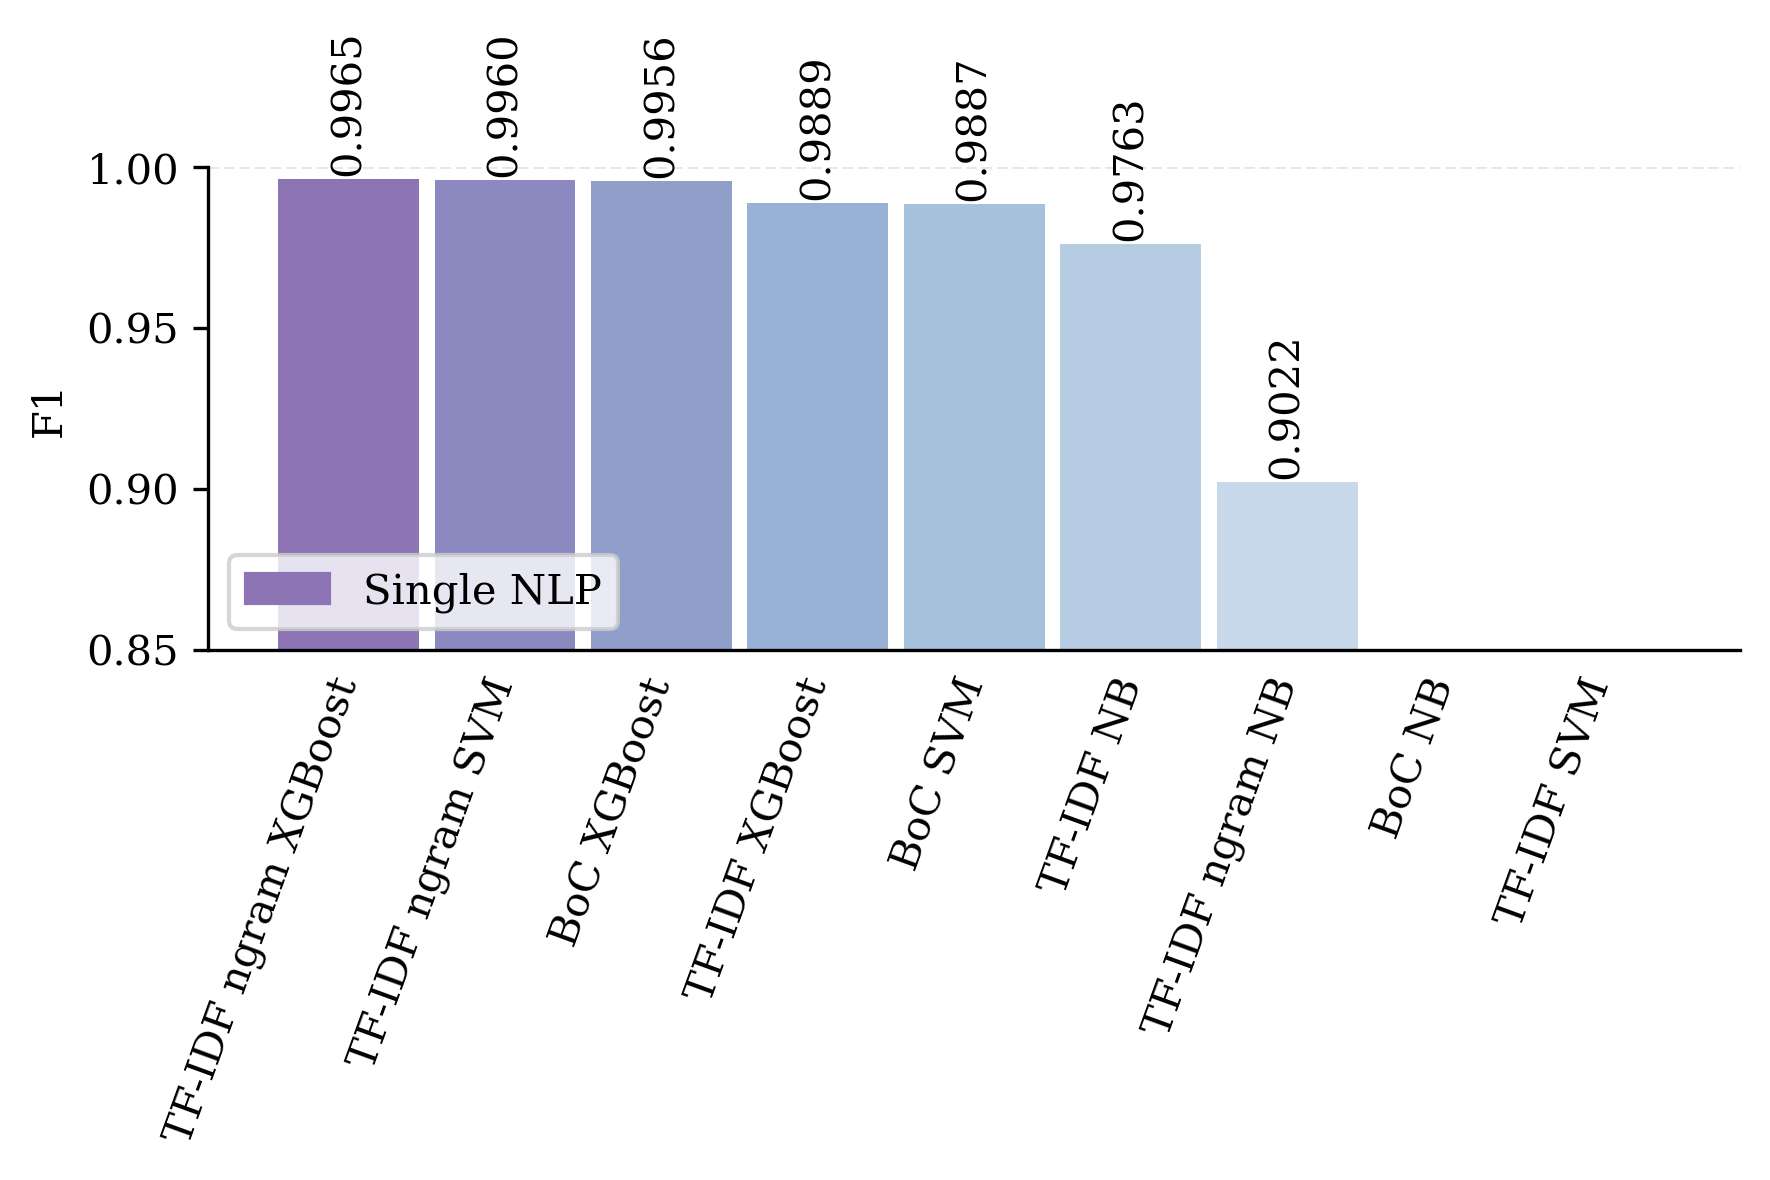

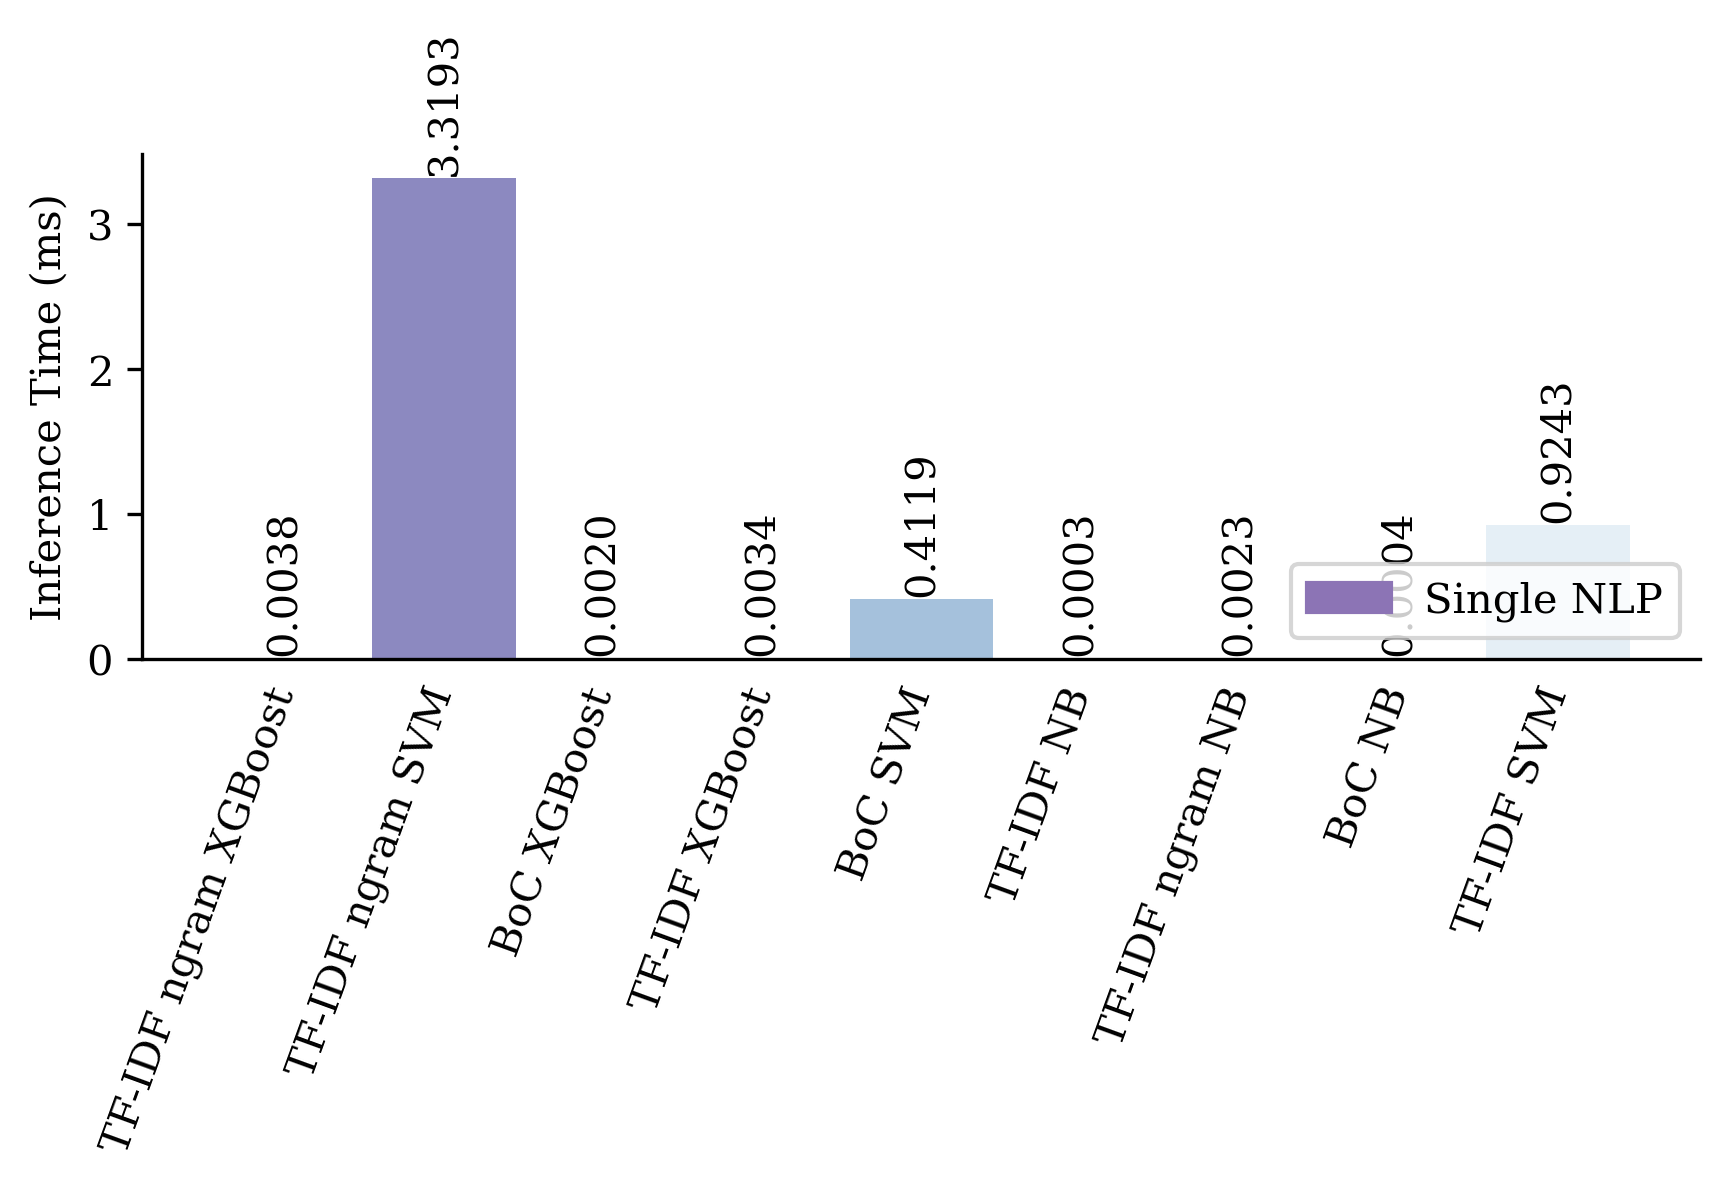

In [20]:
# method_category = 'transformer'
# metrics = ['overall_accuracy', 'precision', 'recall', 'f1', 'training time',
#        'testing time', 'color']
import matplotlib.patches as mpatches
df_small = df.sort_values(['category','f1_score'],ascending=[True, False])
df_small = rename_table_labels(df_small)
#df_small = df.loc[methods[method_category], metrics]
#df_small = df_small.sort_values(['category','f1'],ascending=[True, False])

# legend
color_cat_1 = np.asarray(df_small[df_small['category']=='classic_ml'] 
                         .head(1)['color'].values[0][0], dtype=np.float32) 
legend_cat_1 = mpatches.Patch(color=color_cat_1, label='Single NLP')

# Figure
current_figure_name = 'all_f1_sorted_f1.png'
fig, ax = plt.subplots(figsize=(6, 4))
my_plot_bar(df_small,ax,'F1')
plt.axhline(1, linestyle='--', linewidth=0.7, color=[0.9,0.9,0.9], zorder=0)
ax.set(ylim=(0.85, 1))
ax.set_ylabel('F1')
ax.legend(handles=[legend_cat_1],  loc='lower left')

fig.tight_layout()
if SAVE_OUTPUTS:
    ax.get_figure().savefig(figure_folder / current_figure_name)
###############################
current_figure_name = 'all_f1_sorted_inference_time.png'
fig, ax = plt.subplots(figsize=(6, 4))
my_plot_bar(df_small,ax,'Inference Time (ms)')
ax.set_ylabel('Inference Time (ms)')
ax.legend(handles=[legend_cat_1],  loc='lower right')
fig.tight_layout()
if SAVE_OUTPUTS:
    ax.get_figure().savefig(figure_folder / current_figure_name)

print(plt.rcParams['font.family'])

In [21]:
def process_style_to_my_latex_format(df_latex):
  # returns style object
  
  s = df_latex.style
  s = s.format(precision=4, escape="latex")
  return s

### Single NLP (F1 vs Inference)

In [22]:
df_small

,Accuracy,Precision,Recall,F1,TP,TN,FP,FN,feature_method,model,...,Test Size,extraction_time,feature_size,Training Time (ms),threshold,Inference Time (ms),Dataset,category,Method,color
3,0.997386,0.999557,0.993401,0.996470,2258,3848,1,15,tf-idf_ngram,xgboost,...,6122,5.671179,29216,0.620629,0.5,0.003754,SQLiV3.tsv,classic_ml,TF-IDF ngram XGBoost,"[[0.5490196078431373, 0.45333333333333337, 0.7..."
5,0.997060,0.999557,0.992521,0.996026,2256,3848,1,17,tf-idf_ngram,svm,...,6122,5.671179,29216,11.038512,0.5,3.319284,SQLiV3.tsv,classic_ml,TF-IDF ngram SVM,"[[0.5490196078431373, 0.5379777008842753, 0.75..."
6,0.996733,0.999557,0.991641,0.995583,2254,3848,1,19,bag_of_characters,xgboost,...,6122,1.378724,77,0.081869,0.5,0.002012,SQLiV3.tsv,classic_ml,BoC XGBoost,"[[0.5634140715109573, 0.6186236063052672, 0.79..."
0,0.991833,0.996871,0.981082,0.988914,2230,3842,7,43,tf-idf,xgboost,...,6122,0.951603,21019,0.068004,0.5,0.003364,SQLiV3.tsv,classic_ml,TF-IDF XGBoost,"[[0.5988465974625145, 0.6934256055363323, 0.83..."
8,0.991669,0.994657,0.982842,0.988714,2234,3837,12,39,bag_of_characters,svm,...,6122,1.378724,77,0.584460,0.5,0.411925,SQLiV3.tsv,classic_ml,BoC SVM,"[[0.6465051903114187, 0.75600153787005, 0.8646..."
1,0.982359,0.975824,0.976683,0.976253,2220,3794,55,53,tf-idf,naive_bayes,...,6122,0.951603,21019,0.000634,0.5,0.000338,SQLiV3.tsv,classic_ml,TF-IDF NB,"[[0.7114648212226067, 0.801276432141484, 0.888..."
4,0.920778,0.832837,0.984162,0.902198,2237,3400,449,36,tf-idf_ngram,naive_bayes,...,6122,5.671179,29216,0.002623,0.5,0.002250,SQLiV3.tsv,classic_ml,TF-IDF ngram NB,"[[0.7764244521337947, 0.8482122260668974, 0.91..."
7,0.854949,0.758492,0.893973,0.820679,2032,3202,647,241,bag_of_characters,naive_bayes,...,6122,1.378724,77,0.000693,0.5,0.000430,SQLiV3.tsv,classic_ml,BoC NB,"[[0.8413840830449827, 0.8974240676662822, 0.94..."
2,0.810683,0.669095,0.969644,0.791809,2204,2759,1090,69,tf-idf,svm,...,6122,0.951603,21019,6.223334,0.5,0.924269,SQLiV3.tsv,classic_ml,TF-IDF SVM,"[[0.8978854286812764, 0.9390234525182622, 0.96..."


In [23]:
# Table: Single NLP
table_name = "single"
caption="Accuracy and inference speed of single NLP methods."
out_file_name = (table_folder / table_name).with_suffix('.tex') 
method_cat = 'classic_ml'
metrics = ['accuracy', 'precision', 'recall', 'f1_score', 'train_time',
       'pred_time', 'color', 'category', 'Method']

df_small = df.loc[df['category']==method_cat,metrics]

df_small = rename_table_labels(df_small)
df_small.set_index('Method', inplace=True)
#print(df_small)

s = process_style_to_my_latex_format(df_small.drop(['color', 'category'], axis=1 ))

s = s.highlight_max(props='textbf:--rwrap;', subset=s.columns[1:-2])
s = s.highlight_min(props='textbf:--rwrap;', subset=s.columns[-2:])

if SAVE_OUTPUTS:
    s.to_latex(buf=out_file_name,
       column_format="lrrrrrr", position="htbp", position_float="centering",
       hrules=True, label=f"tab:{table_name}", caption=caption)

print(s.to_latex(
    column_format="lrrrrrr", position="ht", position_float="centering",
    hrules=True, label=f"table:{table_name}", caption=caption)
)
#df.loc[:,"training time"] / df.loc[:,"train size"]
#(df.loc[:,["training time", "testing time"]]*1000).div(df.loc[:,["train size", "test size"]])

\begin{table}[ht]
\centering
\caption{Accuracy and inference speed of single NLP methods.}
\label{table:single}
\begin{tabular}{lrrrrrr}
\toprule
 & Accuracy & Precision & Recall & F1 & Training Time (ms) & Inference Time (ms) \\
Method &  &  &  &  &  &  \\
\midrule
TF-IDF XGBoost & 0.9918 & 0.9969 & 0.9811 & 0.9889 & 0.0680 & 0.0034 \\
TF-IDF NB & 0.9824 & 0.9758 & 0.9767 & 0.9763 & \textbf{0.0006} & \textbf{0.0003} \\
TF-IDF SVM & 0.8107 & 0.6691 & 0.9696 & 0.7918 & 6.2233 & 0.9243 \\
TF-IDF ngram XGBoost & 0.9974 & \textbf{0.9996} & \textbf{0.9934} & \textbf{0.9965} & 0.6206 & 0.0038 \\
TF-IDF ngram NB & 0.9208 & 0.8328 & 0.9842 & 0.9022 & 0.0026 & 0.0023 \\
TF-IDF ngram SVM & 0.9971 & 0.9996 & 0.9925 & 0.9960 & 11.0385 & 3.3193 \\
BoC XGBoost & 0.9967 & 0.9996 & 0.9916 & 0.9956 & 0.0819 & 0.0020 \\
BoC NB & 0.8549 & 0.7585 & 0.8940 & 0.8207 & 0.0007 & 0.0004 \\
BoC SVM & 0.9917 & 0.9947 & 0.9828 & 0.9887 & 0.5845 & 0.4119 \\
\bottomrule
\end{tabular}
\end{table}



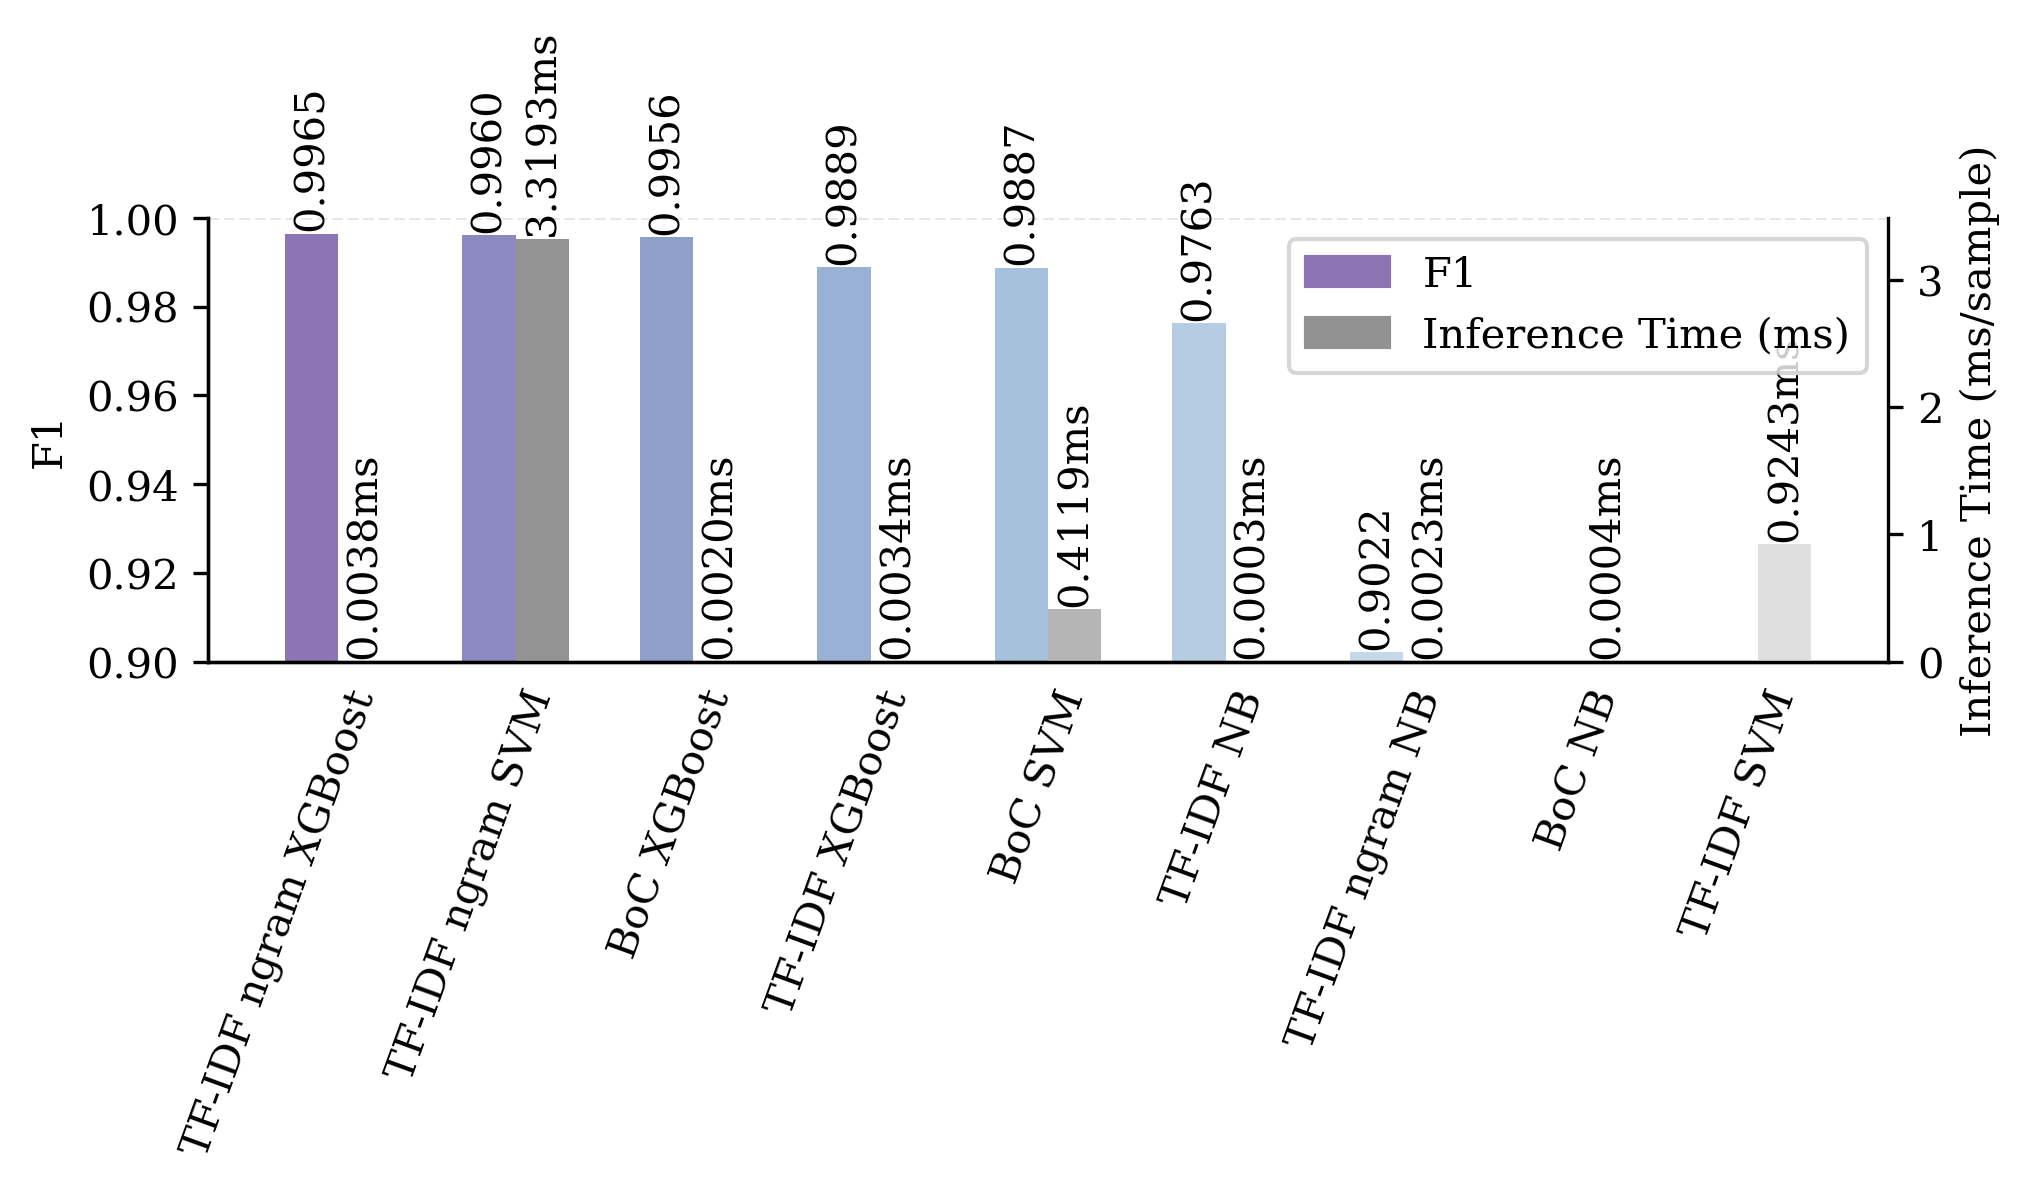

In [24]:
# Figure of Table Single NLP
current_figure_name = 'single_nlp_f1_vs_time.png'
fig, ax = plt.subplots( figsize=(7,4))

metric = ['F1', 'Inference Time (ms)']
df_small = df_small.sort_values(metric,ascending=False)

# legend
color_cat_1 = np.asarray(df_small[df_small['category']=='classic_ml'] 
                         .head(1)['color'].values[0][0], dtype=np.float32)
color_cat_1G = color_cat_1.copy()
color_cat_1G[0:3] = color_cat_1G[0:3].mean()

legend_cat_1 = mpatches.Patch(color=color_cat_1, label=metric[0])
legend_cat_1G = mpatches.Patch(color=color_cat_1G, label=metric[1])


df_small.reset_index(inplace=True)
_, ax2 = my_plot_twin_bar(df_small,ax,metric)
ax.axhline(1,  linestyle='--', linewidth=0.7, color=[0.9,0.9,0.9], zorder=0)
ax.set(ylim=(0.90, 1))
ax.set_ylabel('F1')

ax2.set_ylabel('Inference Time (ms/sample)')
# #ax.set(ylim=(0.95, 1))
ax2.legend(handles=[legend_cat_1, legend_cat_1G],  loc='upper right')

fig.tight_layout()
if SAVE_OUTPUTS:
    ax2.get_figure().savefig(figure_folder / current_figure_name)


### All methods FE score vs alpha

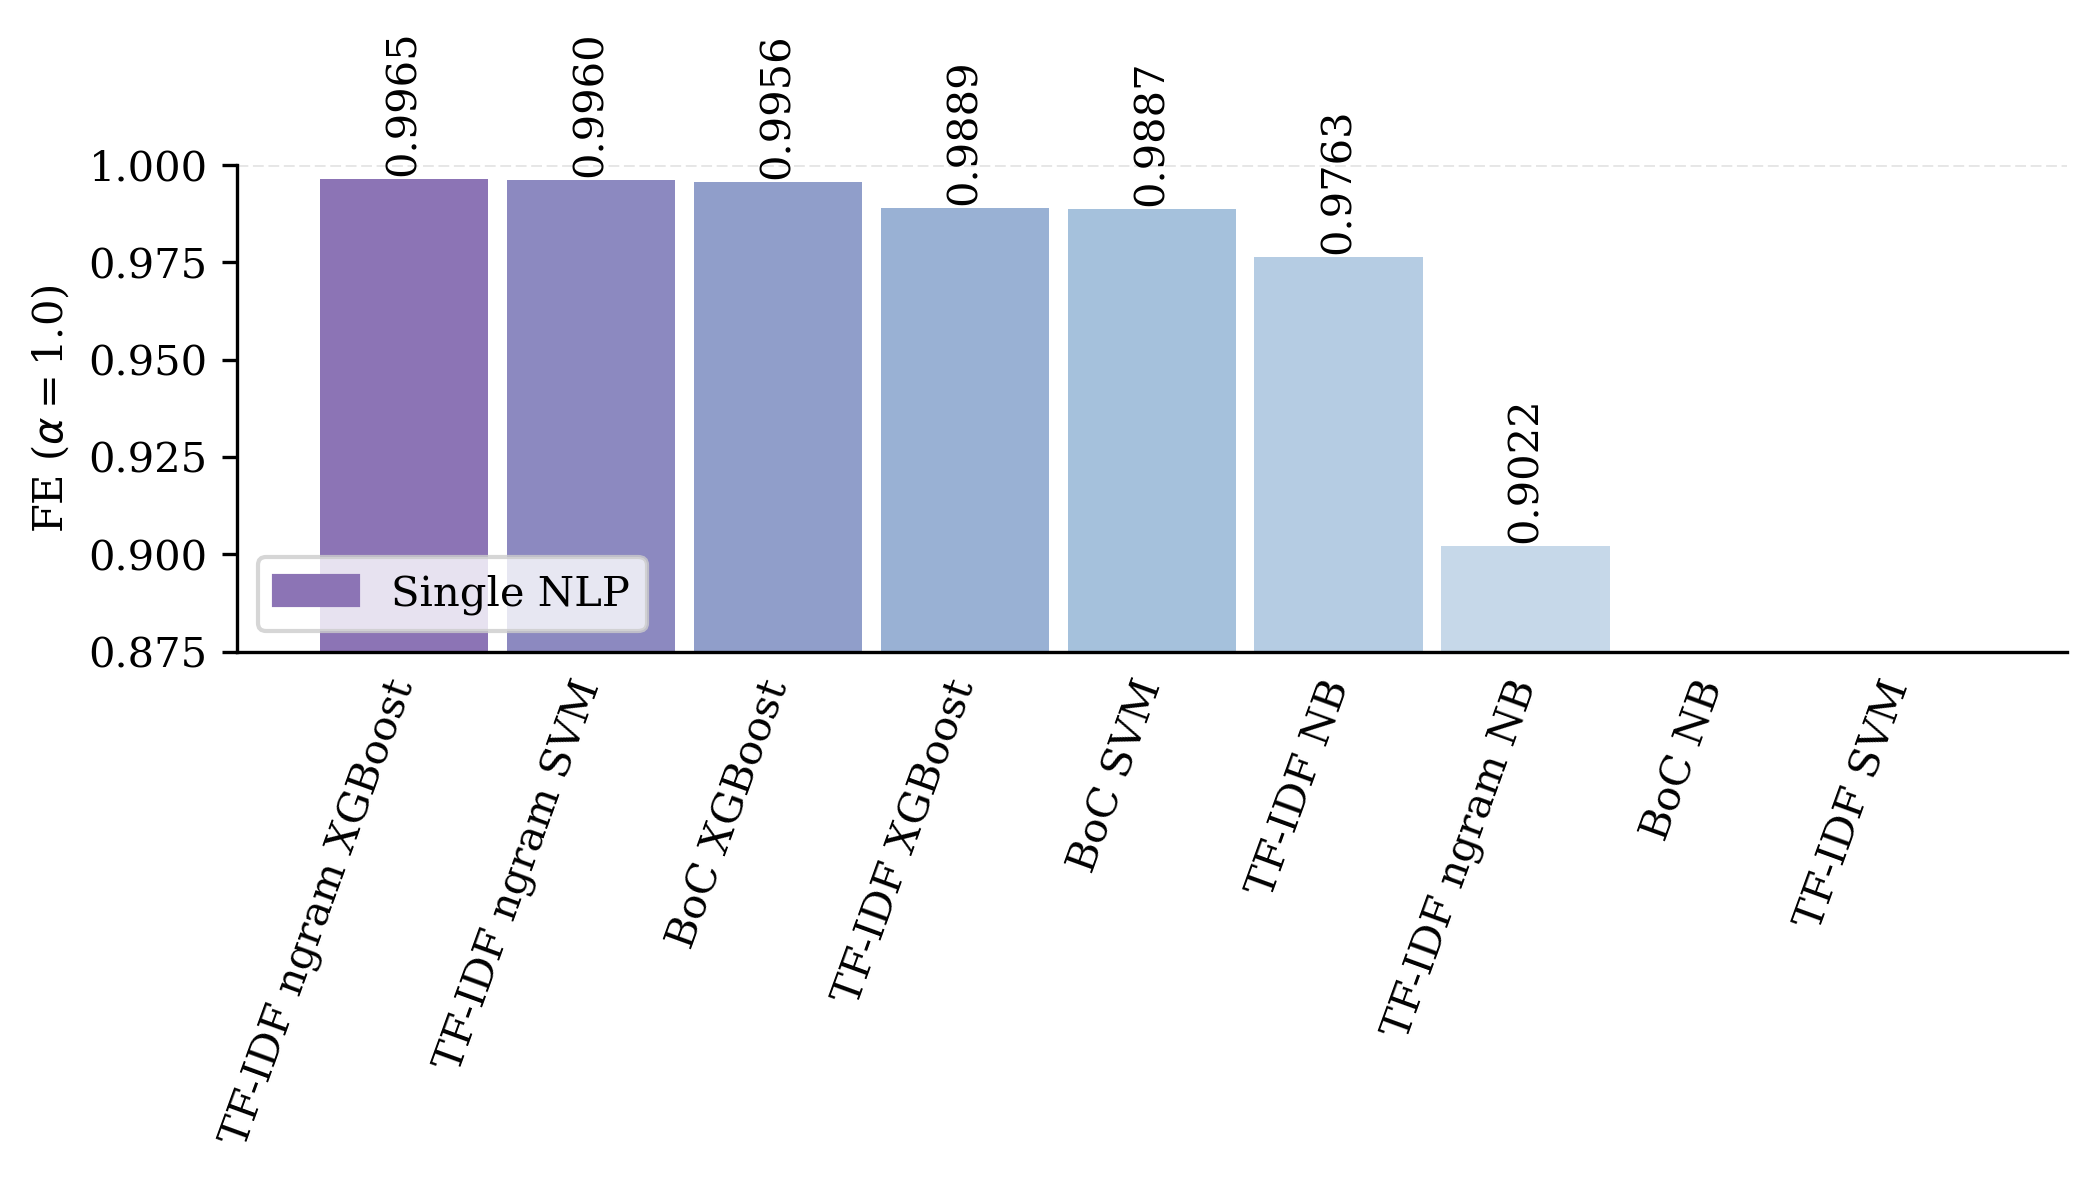

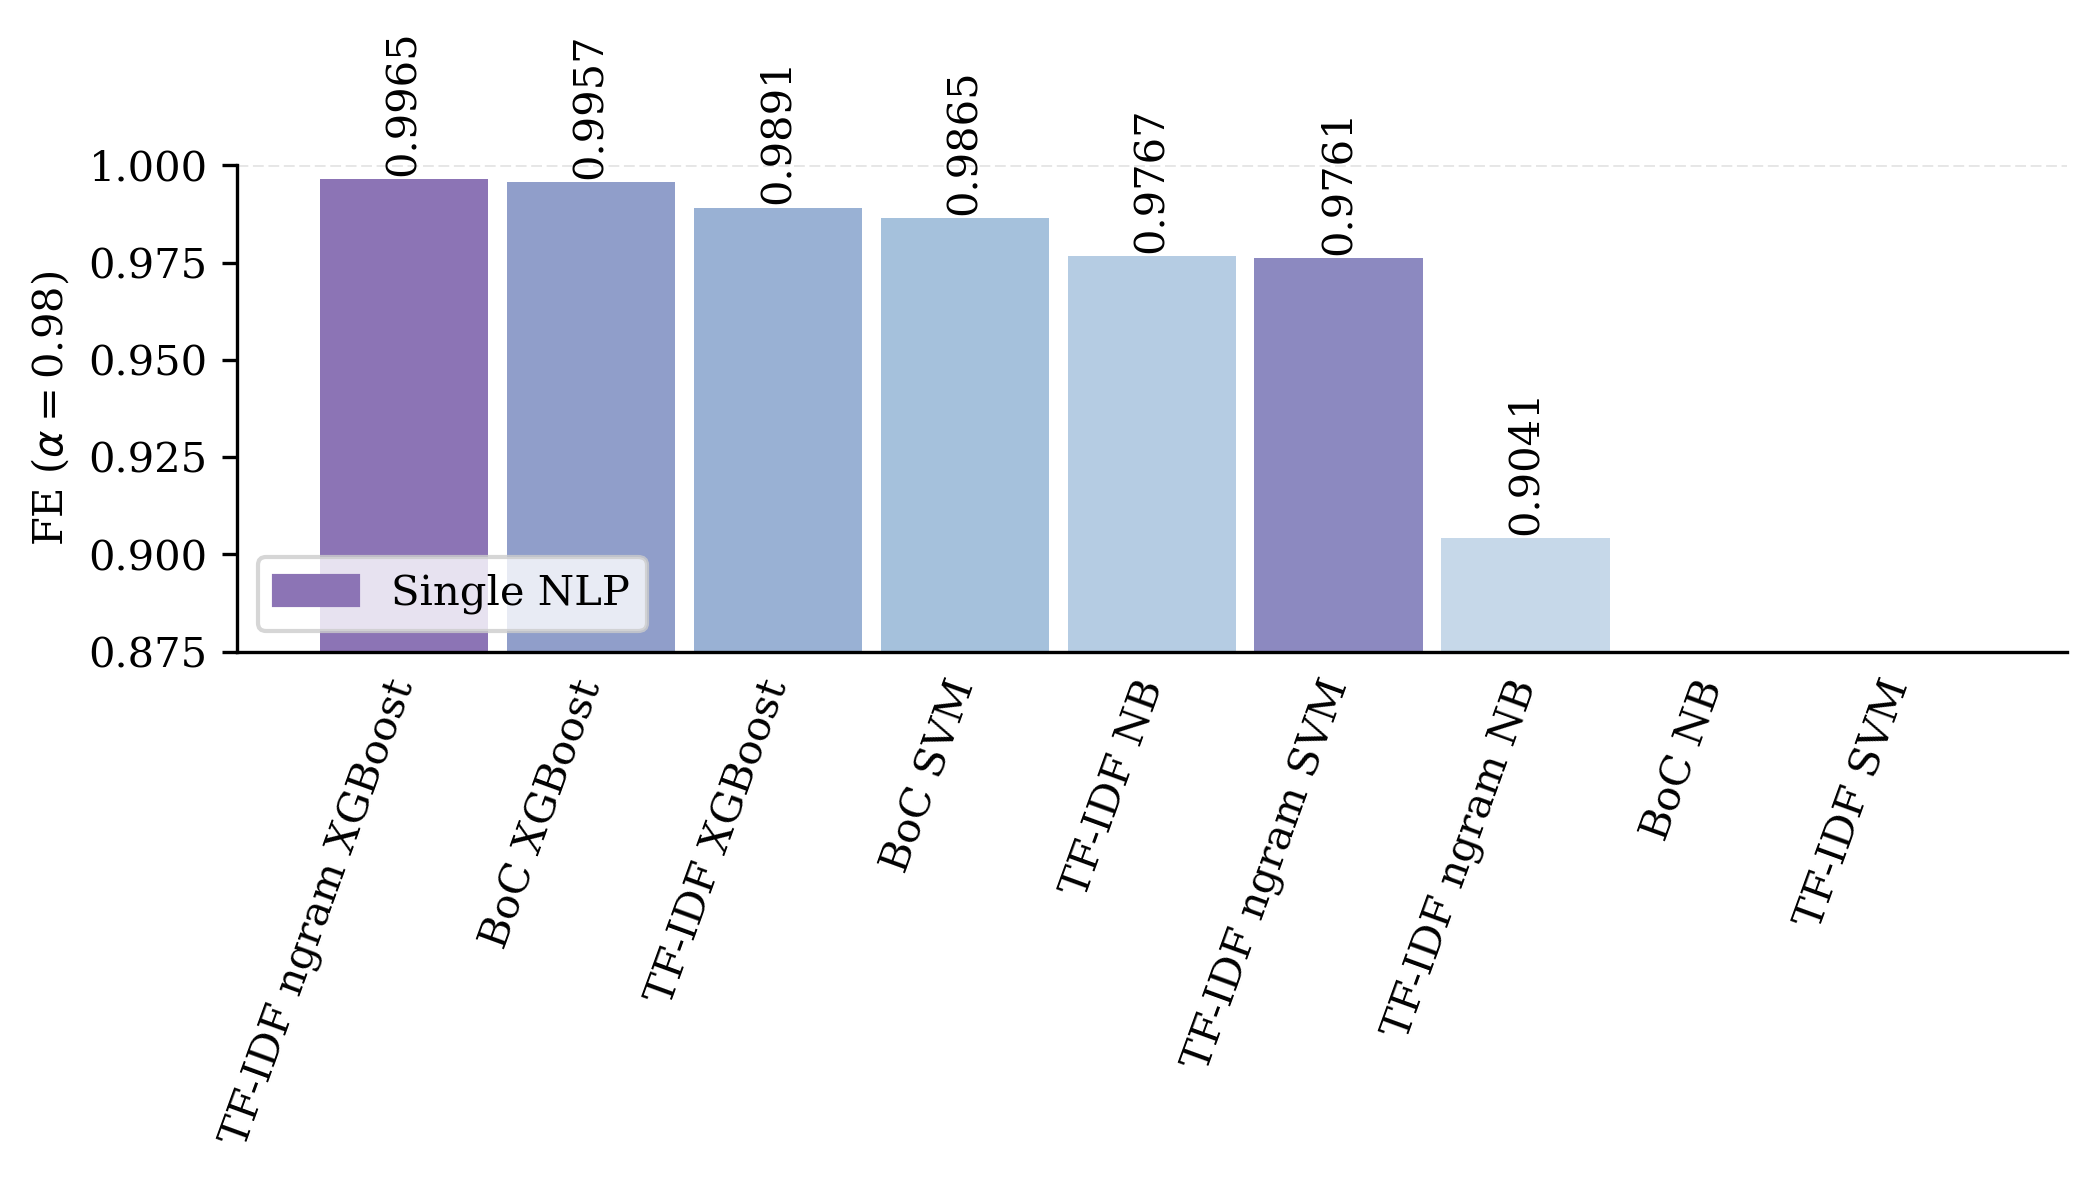

In [25]:
#ALL FE comparison for different alpha
from sklearn import preprocessing

current_figure_name = 'all_nlp_FE_alpha_100.png'

#df_small = df.sort_values(['category','f1'],ascending=[True, False])
df_small = df.sort_values('f1_score',ascending=False)

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(1.0000 - df_small['pred_time'].to_numpy().reshape(-1, 1))
df_small['inference scaled'] = x_scaled

alpha = 1.0
#alpha=1.00 #emphasis on F1 rather than speed
df_small['FE_100'] = alpha*df_small['f1_score'] + (1-alpha)*df_small['inference scaled']
#print(df_small)
alpha = 0.98
df_small['FE_098'] = alpha*df_small['f1_score'] + (1-alpha)*df_small['inference scaled']

df_small = rename_table_labels(df_small)



# legend
color_cat_1 = np.asarray(df_small[df_small['category']=='classic_ml'] 
                         .head(1)['color'].values[0][0], dtype=np.float32) 
legend_cat_1 = mpatches.Patch(color=color_cat_1, label='Single NLP')

# Figure
fig, ax = plt.subplots(figsize=(7, 4))
df_small = df_small.sort_values('FE_100',ascending=False)

my_plot_bar(df_small,ax,'FE_100')
plt.axhline(1, linestyle='--', linewidth=0.7, color=[0.9,0.9,0.9], zorder=0)

ax.set_ylabel('FE'+ r' ($\alpha=$' + f'{1.0})')
#ax.set_xlabel(r'$\alpha=$' + f'{alpha}')
ax.set(ylim=(0.875, 1))
ax.legend(handles=[legend_cat_1],  loc='lower left')

fig.tight_layout()
if SAVE_OUTPUTS:
    ax.get_figure().savefig(figure_folder / current_figure_name)

#########################
current_figure_name = 'all_nlp_FE_alpha_090.png'
fig, ax = plt.subplots(figsize=(7, 4))
df_small = df_small.sort_values('FE_098',ascending=False)
my_plot_bar(df_small,ax,'FE_098')
plt.axhline(1, linestyle='--', linewidth=0.7, color=[0.9,0.9,0.9], zorder=0)
ax.set_ylabel('FE'+ r' ($\alpha=$' + f'{0.98})')
#ax.set_xlabel()
ax.set(ylim=(0.875, 1))
ax.legend(handles=[legend_cat_1],  loc='lower left')

fig.tight_layout()
if SAVE_OUTPUTS:
    ax.get_figure().savefig(figure_folder / current_figure_name)

### Scatter plot

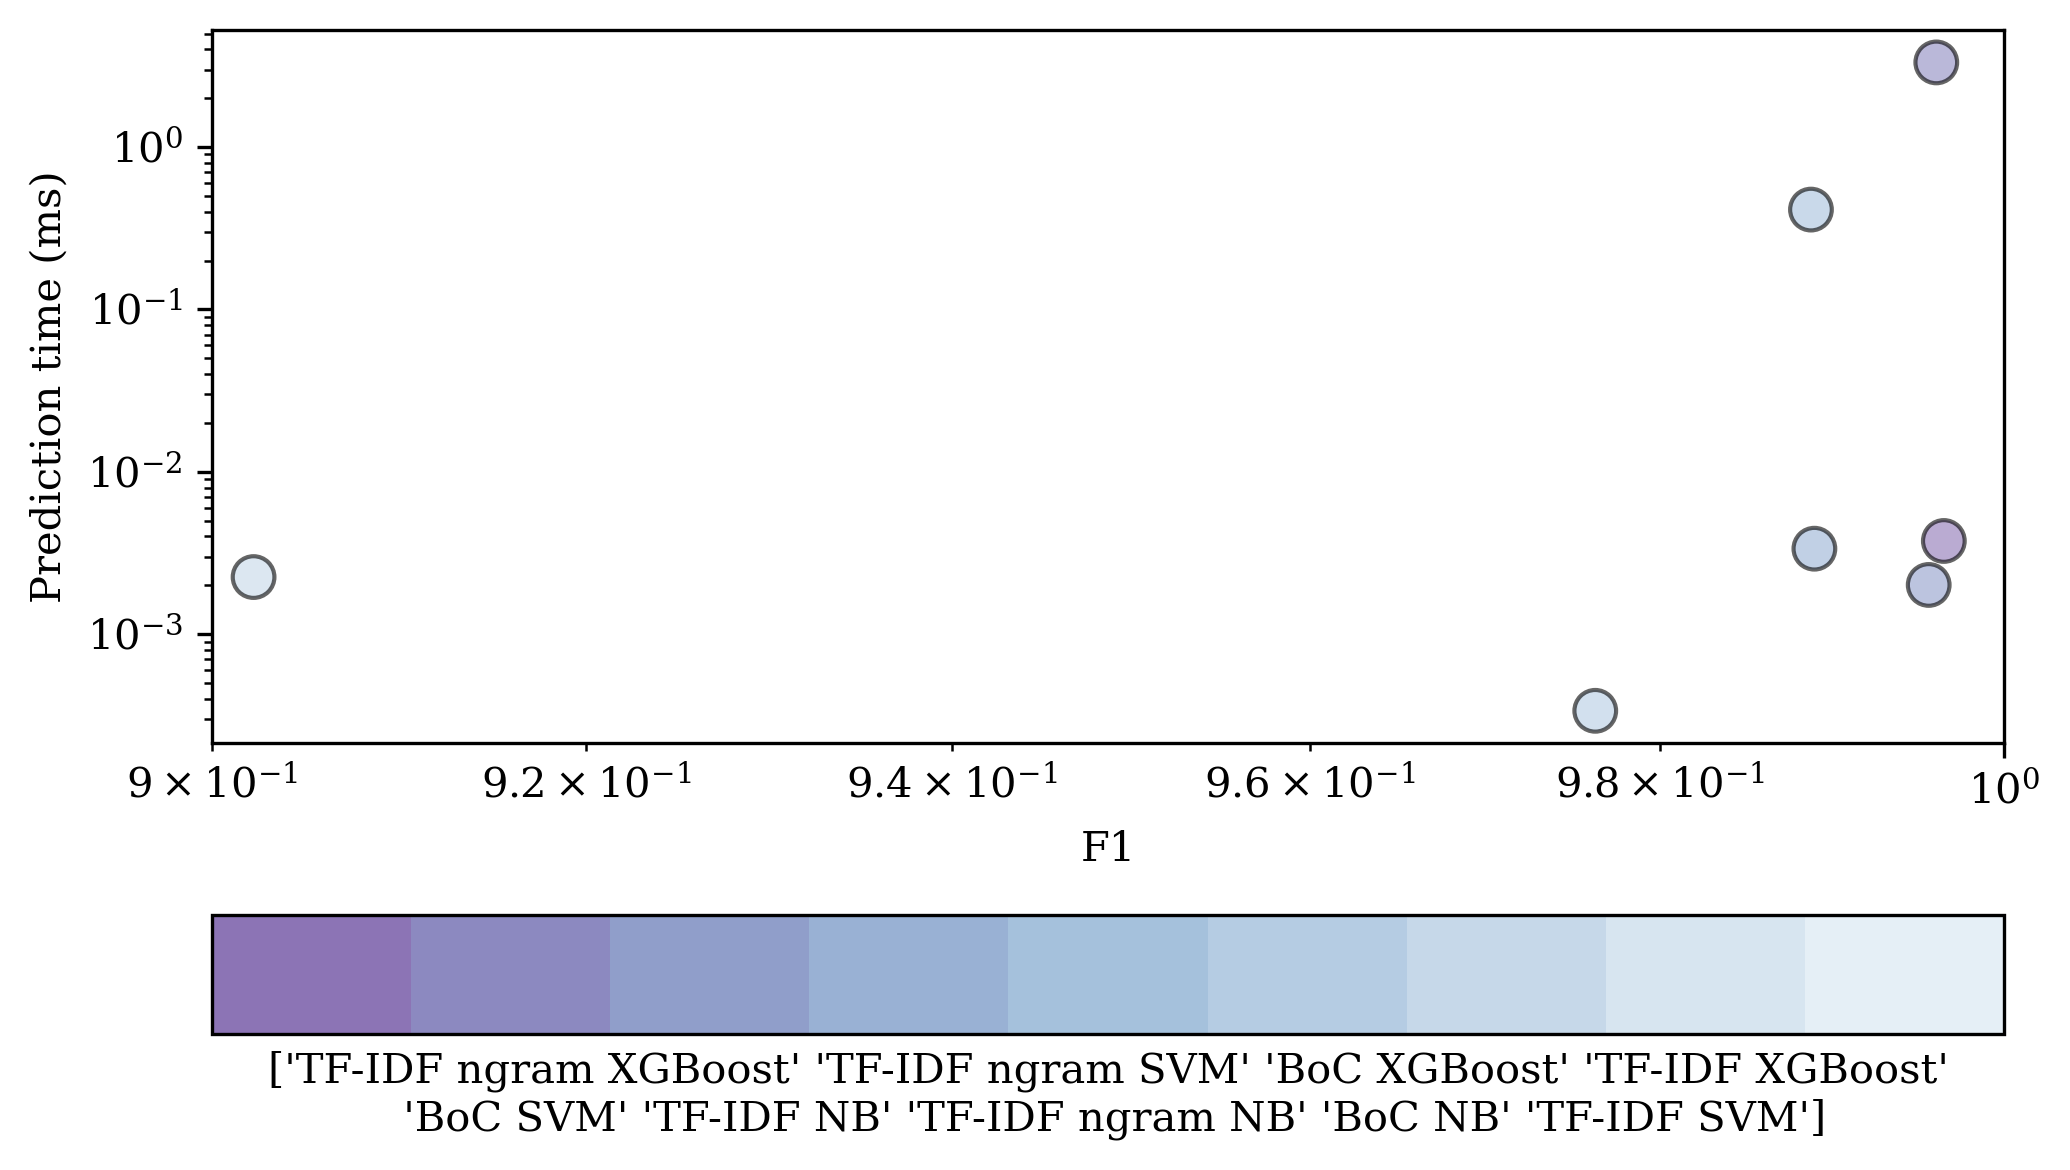

In [81]:
#Scatter plot speed vs F1
from sklearn import preprocessing

current_figure_name = 'speed_vs_f1_scatter.png'

#df_small = df.sort_values(['category','f1'],ascending=[True, False])
df_small = df.sort_values('f1_score',ascending=False)

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(1.0000 - df_small['pred_time'].to_numpy().reshape(-1, 1))
df_small['inference scaled'] = x_scaled
f1 = df_small['f1_score']
t_pred = df_small['pred_time']

colors = df_small.loc[:,'color'].values
colors = [list(colors[i][0]) for i in range(len(colors))]
df_small = rename_table_labels(df_small)

# legend
color_cat_1 = np.asarray(df_small[df_small['category']=='classic_ml'] 
                         .head(1)['color'].values[0][0], dtype=np.float32) 
legend_cat_1 = mpatches.Patch(color=color_cat_1, label='Single NLP')

# Figure
#fig, ax = plt.subplots(figsize=(7, 4))
fig, (ax, ax2) = plt.subplots(2, figsize=(7, 4), gridspec_kw={'height_ratios': [6, 1]})
#my_plot_bar(df_small,ax,'FE_100')
ax.scatter(f1, t_pred, s=100, alpha=0.6, edgecolor='black', linewidth=1, color=colors)

#ax.set(ylim=(0.0002133462738189675, 0.015607442342392))
ax.set(xlim=(0.9, 1))
ax.set_ylabel('Prediction time (ms)')
ax.set_yscale('log')
ax.set_xlabel('F1')
ax.set_xscale('log')
#ax.set_xlabel(r'$\alpha=$' + f'{alpha}')
#ax.legend(handles=[legend_cat_1],  loc='lower left')
ticks = df_small.Method.values
cmap = (matplotlib.colors.ListedColormap(colors))
cbar = plt.colorbar(
    matplotlib.cm.ScalarMappable(cmap=cmap),
    cax=ax2,
    #extend='both',
    ticks=None,
    #spacing='proportional',
    orientation='horizontal',
    label=str(ticks),
)
cbar.ax.tick_params(size=0)
cbar.set_ticks([])

fig.tight_layout()
if SAVE_OUTPUTS:
    ax.get_figure().savefig(figure_folder / current_figure_name)



# TODO
- 

# End